# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict Sales of a particular brick and mortar retail store. The data that we have ranges from 2000 to 2015.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data from the '.csv' file as a monthly Time Series.

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,RetailSales
0,2585
1,3368
2,3210
3,3111
4,3756


## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [3]:
date = pd.date_range(start='1/1/2000', end='8/1/2015', freq='M')
date

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,RetailSales,Time_Stamp
0,2585,2000-01-31
1,3368,2000-02-29
2,3210,2000-03-31
3,3111,2000-04-30
4,3756,2000-05-31


In [5]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


## Plot the Time Series to understand the behaviour of the data.

In [6]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

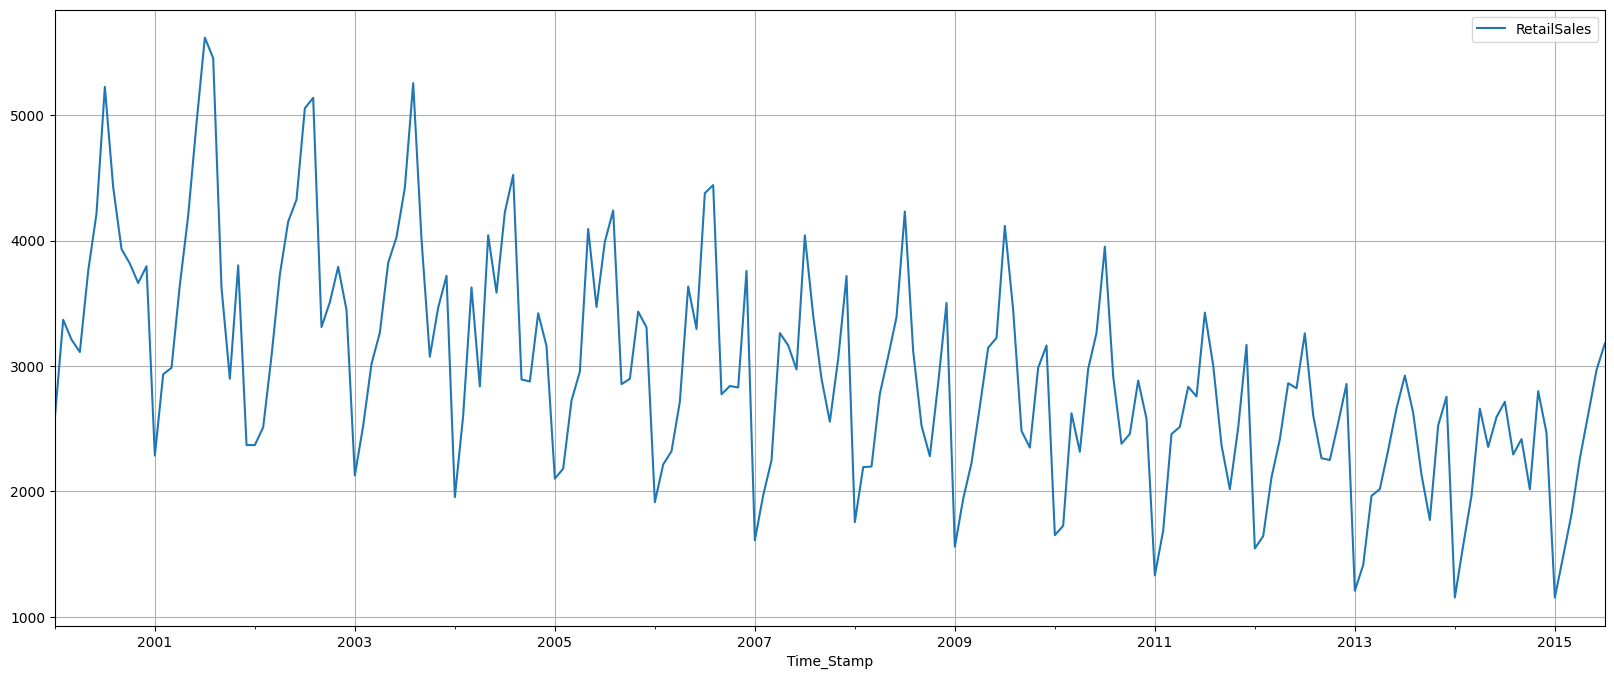

In [7]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [8]:
df.describe()

,RetailSales
count,187.000000
mean,2962.304813
std,878.968431
min,1153.000000
25%,2361.500000
50%,2876.000000
75%,3467.500000
max,5618.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

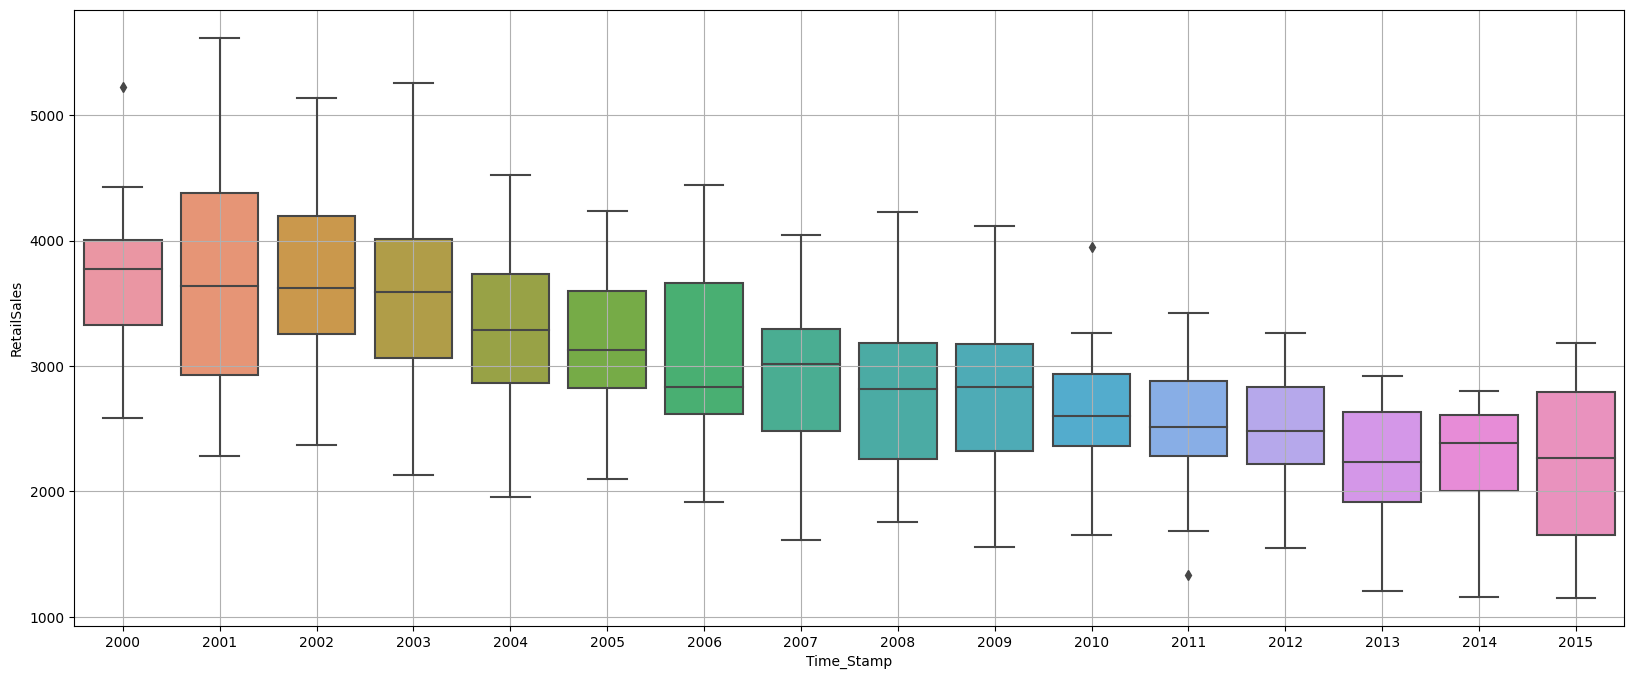

In [9]:
sns.boxplot(x = df.index.year,y = df['RetailSales'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

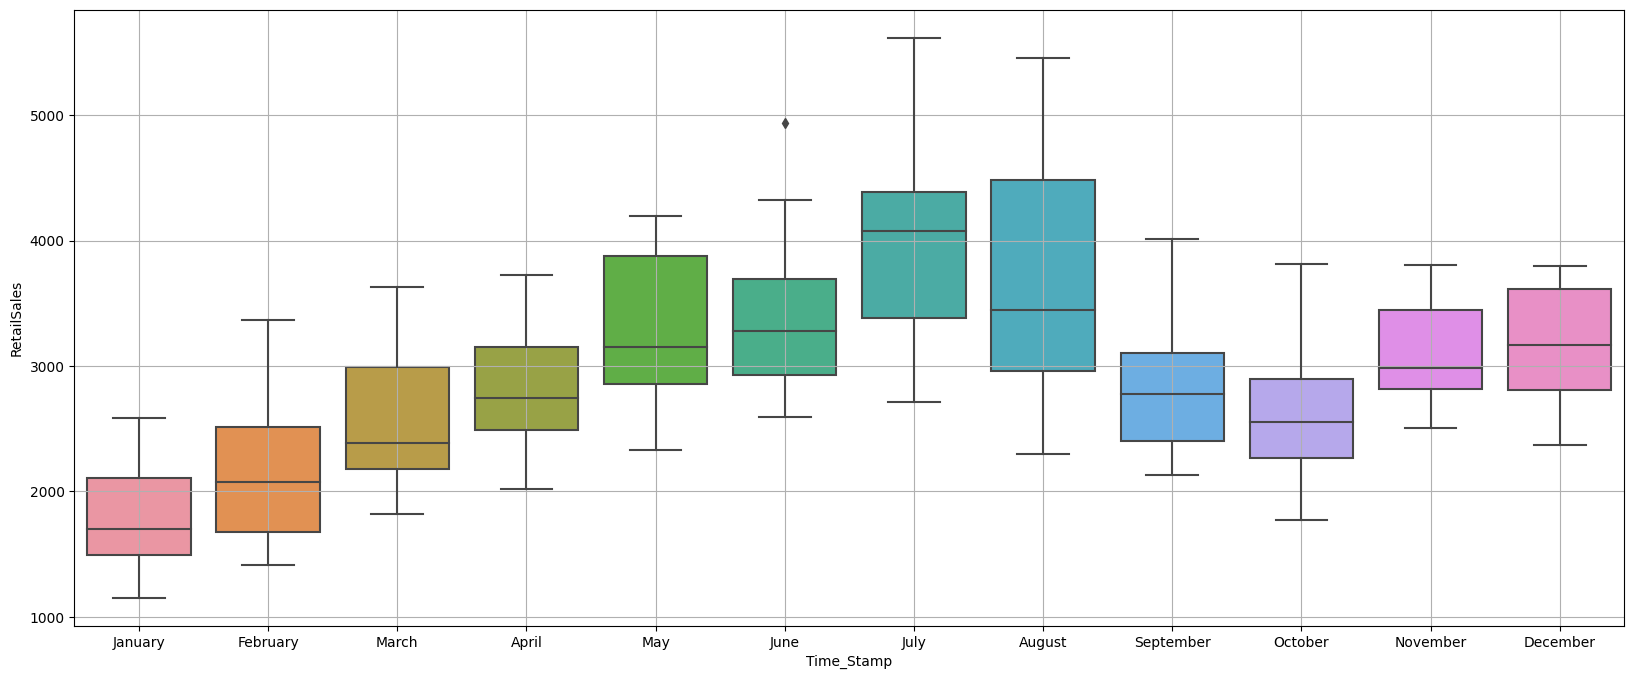

In [10]:
sns.boxplot(x = df.index.month_name(),y = df['RetailSales'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

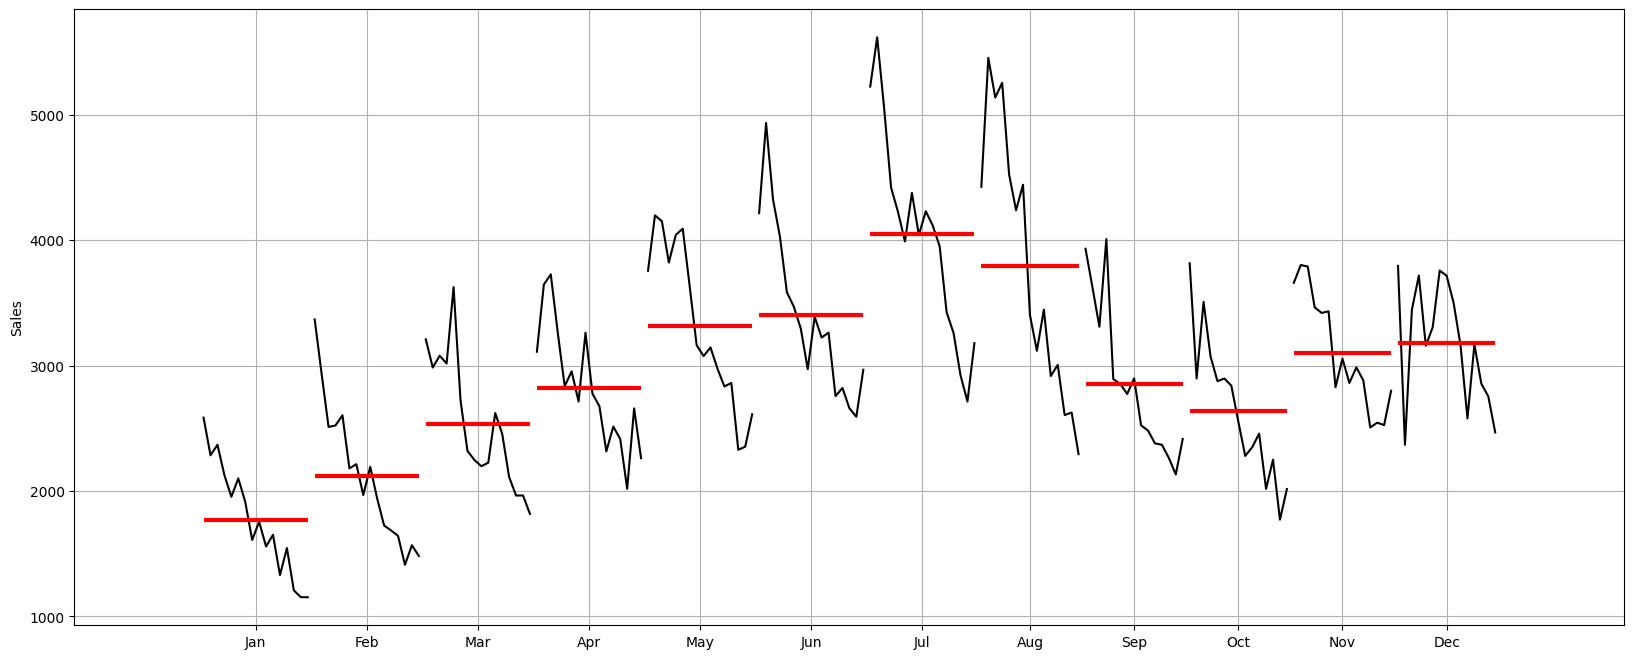

In [11]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['RetailSales'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('RetailSales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [12]:
monthly_sales_across_years = pd.pivot_table(df, values = 'RetailSales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
2000,2585.0,3368.0,3210.0,3111.0,3756.0,4216.0,5225.0,4426.0,3932.0,3816.0,3661.0,3795.0
2001,2285.0,2934.0,2985.0,3646.0,4198.0,4935.0,5618.0,5454.0,3624.0,2898.0,3802.0,2369.0
2002,2369.0,2511.0,3079.0,3728.0,4151.0,4326.0,5054.0,5138.0,3310.0,3508.0,3790.0,3446.0
2003,2127.0,2523.0,3017.0,3265.0,3822.0,4027.0,4420.0,5255.0,4009.0,3074.0,3465.0,3718.0
2004,1954.0,2604.0,3626.0,2836.0,4042.0,3584.0,4225.0,4523.0,2892.0,2876.0,3420.0,3159.0
2005,2101.0,2181.0,2724.0,2954.0,4092.0,3470.0,3990.0,4239.0,2855.0,2897.0,3433.0,3307.0
2006,1914.0,2214.0,2320.0,2714.0,3633.0,3295.0,4377.0,4442.0,2774.0,2840.0,2828.0,3758.0
2007,1610.0,1968.0,2248.0,3262.0,3164.0,2972.0,4041.0,3402.0,2898.0,2555.0,3056.0,3717.0
2008,1755.0,2193.0,2198.0,2777.0,3076.0,3389.0,4231.0,3118.0,2524.0,2280.0,2862.0,3502.0


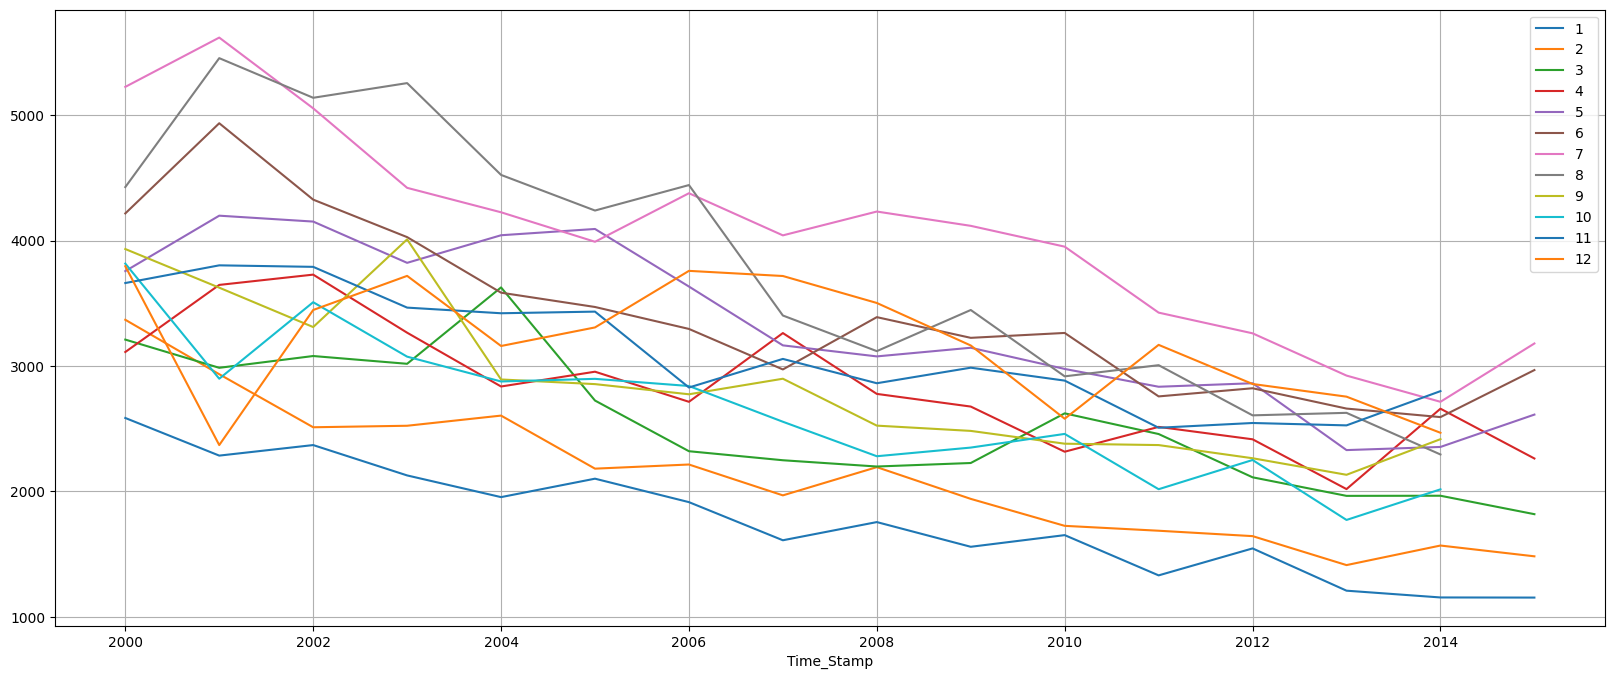

In [13]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

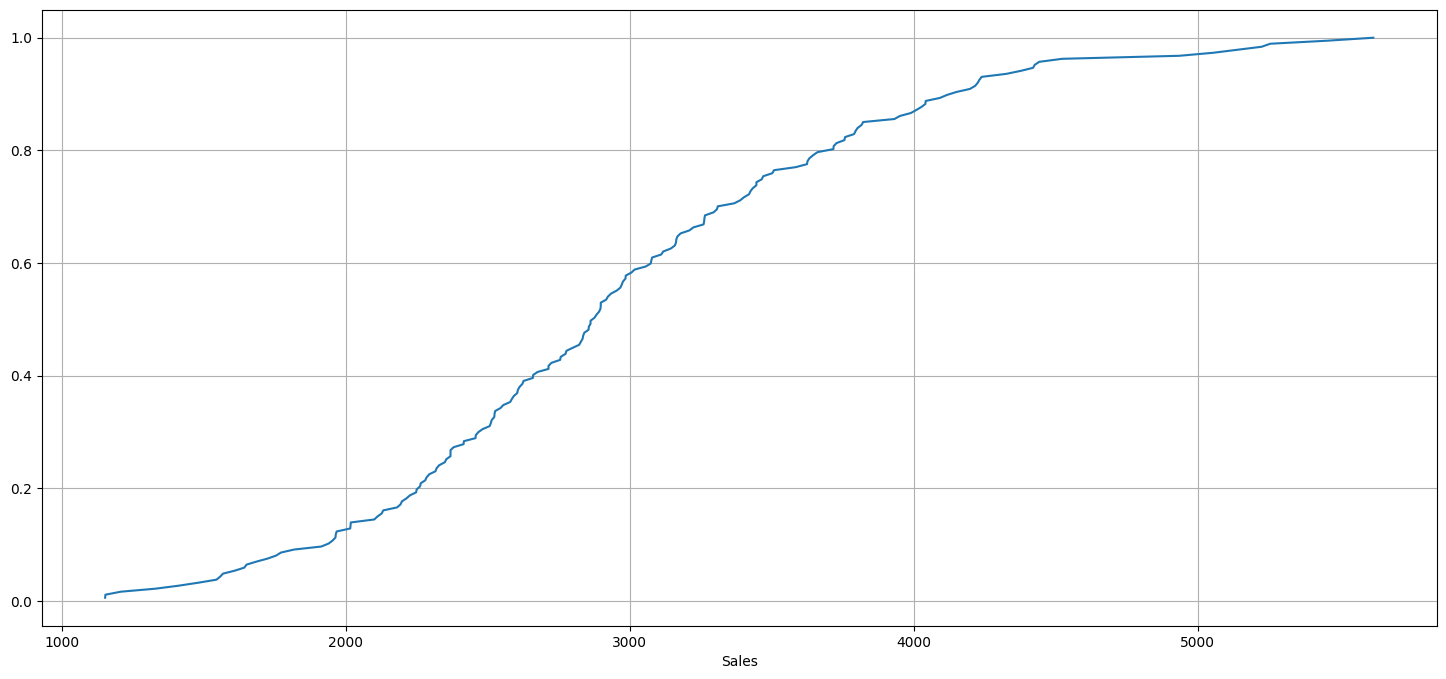

In [14]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['RetailSales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

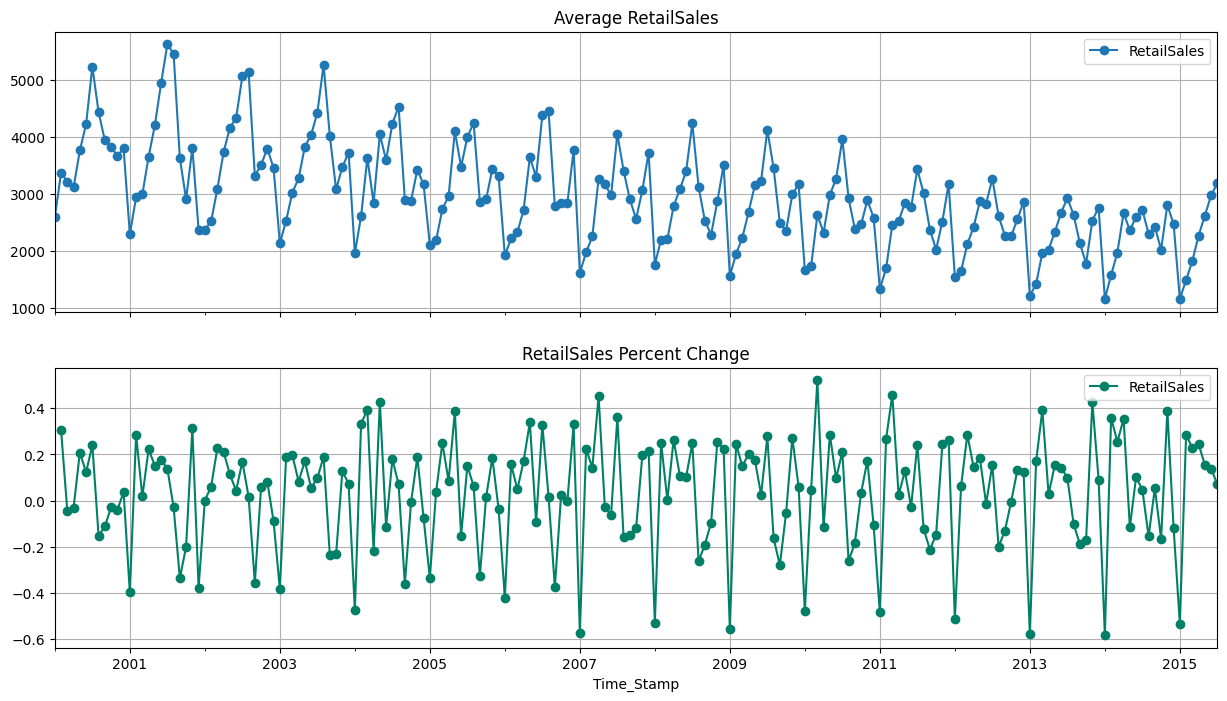

In [15]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["RetailSales"].mean()
pct_change = df.groupby(df.index)["RetailSales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [16]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

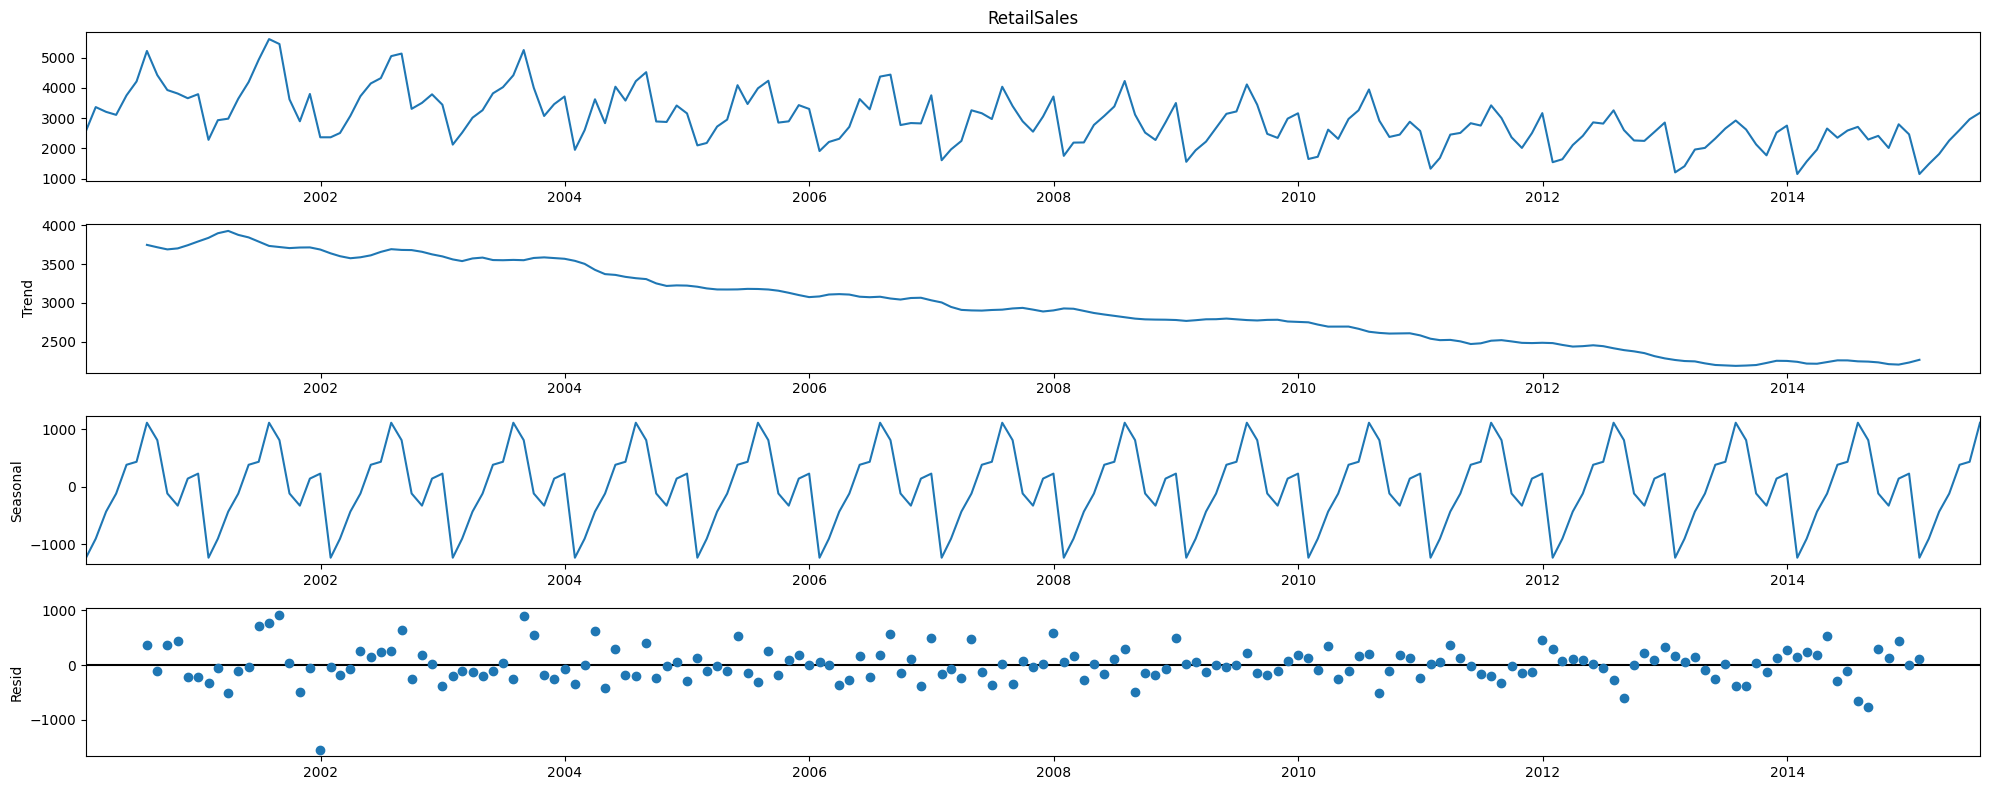

In [17]:
decomposition = seasonal_decompose(df['RetailSales'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [18]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31   -1230.608333
2000-02-29    -900.364286
2000-03-31    -429.435714
2000-04-30    -116.923810
2000-05-31     383.713095
2000-06-30     435.802381
2000-07-31    1113.975000
2000-08-31     811.258333
2000-09-30    -115.036111
2000-10-31    -325.811111
2000-11-30     143.525000
2000-12-31     229.905556
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    365.108333
2000-08-31   -100.591667
2000-09-30    359.161111
2000-10-31    441.0194

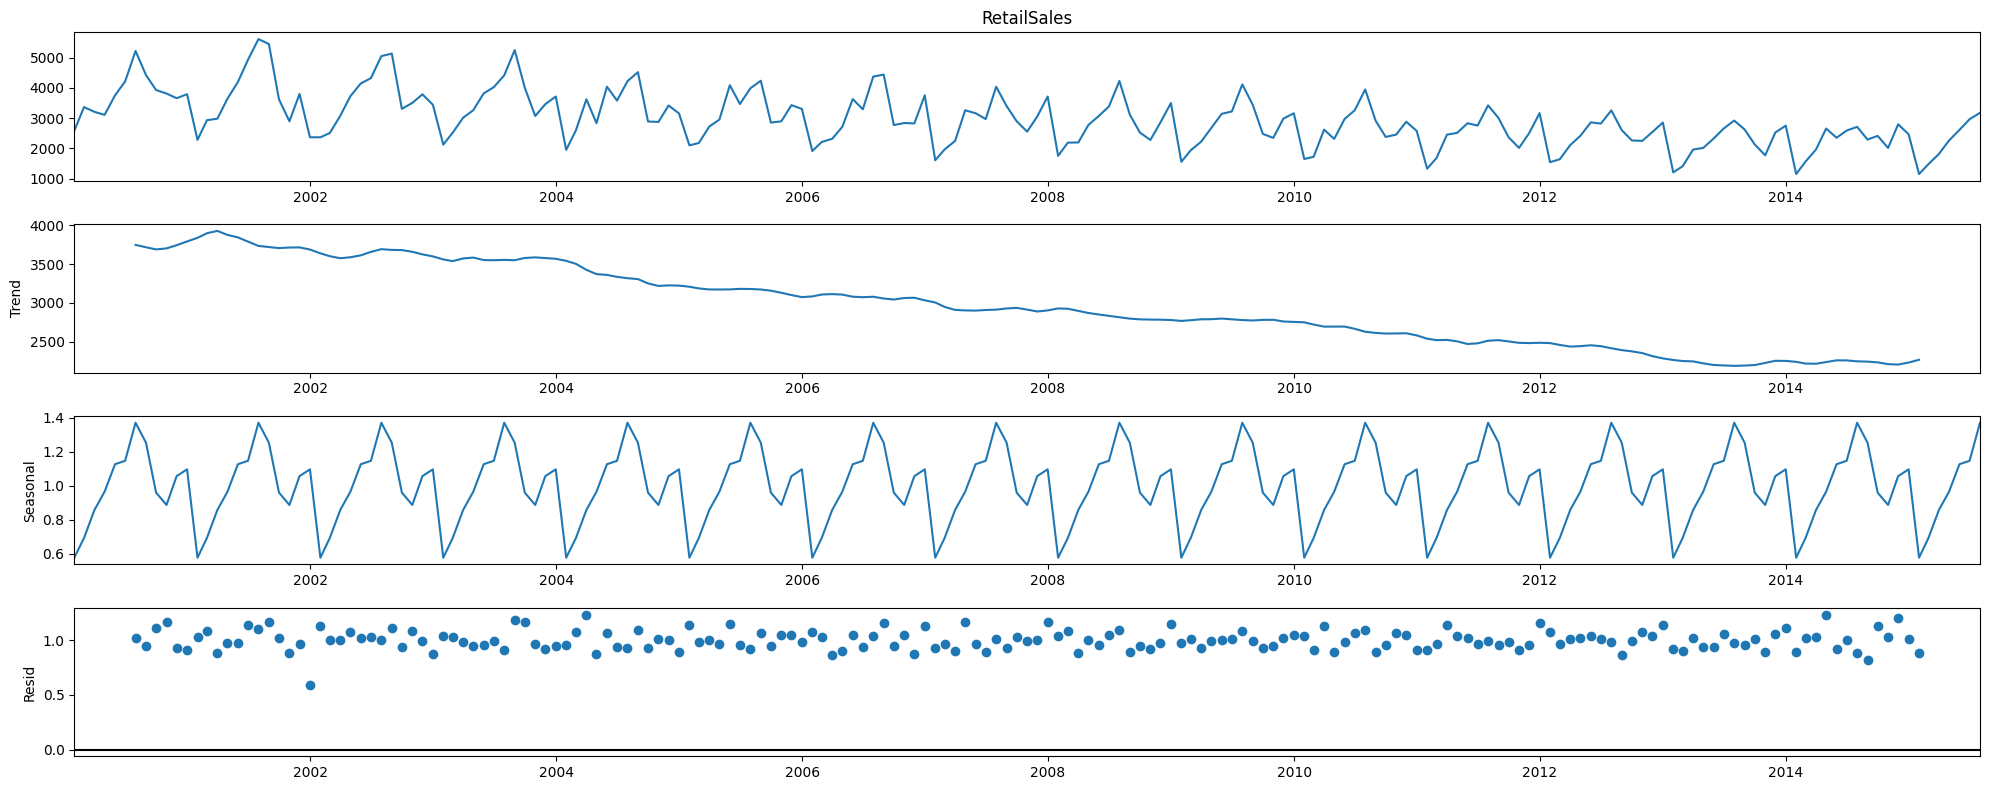

In [19]:
decomposition = seasonal_decompose(df['RetailSales'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [20]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    0.577667
2000-02-29    0.693995
2000-03-31    0.858591
2000-04-30    0.965907
2000-05-31    1.127574
2000-06-30    1.147570
2000-07-31    1.371537
2000-08-31    1.254060
2000-09-30    0.960255
2000-10-31    0.887973
2000-11-30    1.057467
2000-12-31    1.097405
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31    1.017000
2000-08-31    0.949938
2000-09-30    1.110327
2000-10-31    1.161218
2000-11-30    0.925310
2000-12-31    0.912473
Name: r

## Check for stationarity of the whole Time Series data at $\alpha$ =0.05

In [21]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

## Plot the Autocorrelation function plots on the whole data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2010. Test Data is from the beginning of 2011 to the last time stamp provided.

In [22]:
train=df[df.index.year < 2011]
test=df[df.index.year >= 2011]

## Check for stationarity of the Training Data Time Series at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2000-01-31 to 2010-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RetailSales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an <font color='blue'>ARMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Predict on the Test Set using this model and evaluate the model.

## Build an Automated version of an <font color='blue'>ARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

## Predict on the Test Set using this model and evaluate the model.

## Build an Automated version of a <font color='blue'>SARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Predict on the Test Set using this model and evaluate the model.

## Building the most optimum model on the Full Data.

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

# END